In [2]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

In [3]:
'''
First define a function to read in fasta file.
1. adding line = line.rstrip(), which will remove \n at the end of each line
2. save results as a generator object, with name (strains) and seq (genomes), easier to store and reference

'''
import pandas as pd
import numpy as np

def read_fasta(fp):
        name, seq = None, []
        for line in fp:
            line = line.rstrip()
            if line.startswith(">"):
                if name: yield (name, ''.join(seq))
                name, seq = line, []
            else:
                seq.append(line)
        if name: yield (name, ''.join(seq))

            

In [4]:
#adding strain data to one array and genomic data to the other
strains = []
genomes = []

with open(r'C:/Users/srava/BedfordProjects/zika/results/aligned.fasta') as fp:
    for name, seq in read_fasta(fp):
            strains.append(name)
            genomes.append(seq)

In [5]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [6]:
# Return the Hamming distance between string1 and string2.
# string1 and string2 should be the same length.
def hamming_distance(array1, array2): 
    # Start with a distance of zero, and count up
    distance = 0
    # Loop over the indices of the string
    L = len(array1)
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if array1[i] != array2[i] and array1[i] != 'N' and array2[i] != 'N':
            distance += 4
    # Return the final count of differences
    return distance

In [7]:
def hamming_distance2(array1, array2):
    array1 = np.frombuffer(array1.encode(),dtype="s1")
    array2 = np.frombuffer(array2.encode(),dtype="s2")
    indices = (array1 != "N")&(array2 != "N")
    return (array1[indices] != array2[indices]).sum()

In [8]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0,len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        numbers.append(num)
    matrixOfNum.append(numbers)
    numbers = []
dataa = pd.DataFrame(matrixOfNum, columns = ["strain " + str(i) for i in range(1,len(matrixOfNum) + 1)], dtype="float")
print(dataa)

     strain 1  strain 2  strain 3  strain 4  strain 5  strain 6  strain 7  \
0         0.0      48.0      60.0      56.0      76.0      52.0      48.0   
1        48.0       0.0      60.0      56.0      72.0      52.0      44.0   
2        60.0      60.0       0.0      68.0      84.0      64.0      56.0   
3        56.0      56.0      68.0       0.0      32.0      60.0      52.0   
4        76.0      72.0      84.0      32.0       0.0      80.0      76.0   
5        52.0      52.0      64.0      60.0      80.0       0.0      52.0   
6        48.0      44.0      56.0      52.0      76.0      52.0       0.0   
7        52.0      48.0      60.0      48.0      72.0      56.0      52.0   
8        52.0      48.0      60.0      56.0      80.0      56.0      52.0   
9        72.0      76.0      88.0      84.0     108.0      84.0      76.0   
10       72.0      76.0      88.0      84.0     108.0      84.0      76.0   
11       60.0      60.0      64.0      64.0      80.0      64.0      56.0   

AxesSubplot(0.125,0.125;0.62x0.755)


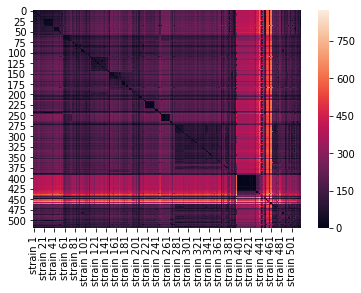

In [9]:
import seaborn as sns
print(sns.heatmap(dataa))


In [177]:
Z = linkage(principalDf, 'ward')

In [170]:
principalDf = pd.DataFrame(Z)

In [171]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t',encoding='utf-8')
country_df = metadata_df[['country','strain']]
 
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']


colors_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\config\colors.tsv', delimiter='\t',encoding='utf-8')
colors_df.columns = ['y','country', 'color']
colors_df1 = colors_df[['country','color']]

result = pd.merge(metadata_df,
                 colors_df1[['country', 'color']],
                 on='country')
result_df_region = result[['strain','region']]
result_df = result[['region', 'strain','country','color']]

finalDf = pd.concat([principalDf, result_df[['region','country','strain']]], axis = 1)
finalDf.columns = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4','region', 'country', 'strain']

In [172]:
finalDf

,cluster 1,cluster 2,cluster 3,cluster 4,region,country,strain
0,47.0,53.0,1.462169,2.0,oceania,french_polynesia,1_0015_PF
1,133.0,144.0,1.617141,2.0,oceania,french_polynesia,1_0016_PF
2,5.0,14.0,1.973413,2.0,oceania,french_polynesia,1_0030_PF
3,173.0,199.0,2.324462,2.0,oceania,french_polynesia,1_0035_PF
4,6.0,27.0,3.123767,2.0,oceania,french_polynesia,1_0038_PF
5,3.0,17.0,3.126454,2.0,oceania,french_polynesia,1_0049_PF
6,150.0,163.0,3.332904,2.0,oceania,french_polynesia,1_0080_PF
7,57.0,62.0,3.621728,2.0,oceania,french_polynesia,1_0087_PF
8,121.0,161.0,4.034691,2.0,oceania,french_polynesia,1_0111_PF
9,229.0,245.0,4.087105,2.0,oceania,french_polynesia,1_0117_PF


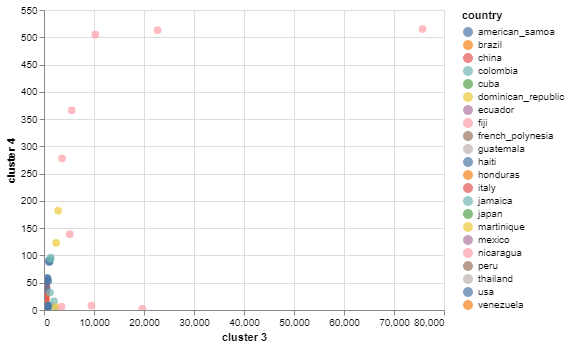

In [173]:
import altair as alt

alt.Chart(finalDf).mark_circle(size=60).encode(
    x='cluster 3',
    y='cluster 4',
    color='country',
    tooltip=['strain', 'country']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

In [174]:
import scipy.spatial.distance as ssd
# convert the redundant n*n square matrix form into a condensed nC2 array
distArray = ssd.squareform(dataa)

In [175]:
Z = linkage(principalDf, 'ward')

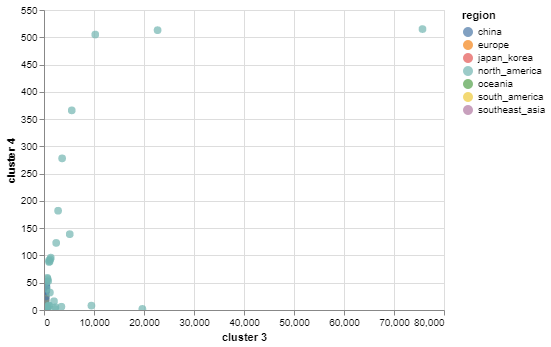

In [176]:
import altair as alt

alt.Chart(finalDf).mark_circle(size=60).encode(
    x='cluster 3',
    y='cluster 4',
    color='region',
    tooltip=['strain', 'region']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)